# Introduction

The dataset provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts. There are 260 rows and corresponding to them, information about 24 nutritional parameters.
This notebook is aimed to study the interesting facts about nutritional value of McDonald's menu. I t exploresthe relationship between various parameters.


In [1]:
#Let's first do the necessary imports
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data in pandas dataframe
df = pd.read_csv("menu.csv")

In [3]:
# Setting the scale for seaborn plots
sns.set(font_scale=1.5)

In [4]:
#Let's have a look at the dataset
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Now, let us check if there are any null values in dataset.

In [5]:
print(df.isnull().any())

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool


Thats great! There are no null values in the dataset

In [6]:
# A look at the description
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


Lets look at the unique Categories and items in Mcdonald's menu.

In [7]:
# Unique Categories
df["Category"].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

In [8]:
# Unique Items
df["Item"].unique()

array(['Egg McMuffin', 'Egg White Delight', 'Sausage McMuffin',
       'Sausage McMuffin with Egg', 'Sausage McMuffin with Egg Whites',
       'Steak & Egg McMuffin',
       'Bacon, Egg & Cheese Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit (Large Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)',
       'Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)',
       'Sausage Biscuit (Regular Biscuit)',
       'Sausage Biscuit (Large Biscuit)',
       'Sausage Biscuit with Egg (Regular Biscuit)',
       'Sausage Biscuit with Egg (Large Biscuit)',
       'Sausage Biscuit with Egg Whites (Regular Biscuit)',
       'Sausage Biscuit with Egg Whites (Large Biscuit)',
       'Southern Style Chicken Biscuit (Regular Biscuit)',
       'Southern Style Chicken Biscuit (Large Biscuit)',
       'Steak & Egg Biscuit (Regular Biscuit)',
       'Bacon, Egg & Cheese McGriddles',
       'Bacon, Egg & Cheese McGriddles with Egg Whites',
       'Sau

## Exploratory Data Analysis(EDA)

Let us explore the data t o find some interesting facts. First,we are starting with countplot. Let's see how many varities you have in a McDonald's meal.

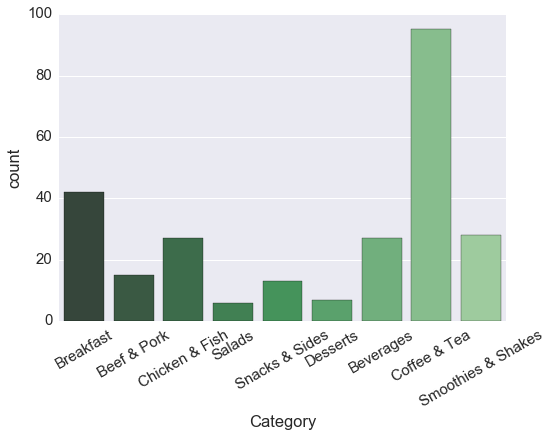

In [9]:
# Count plot for meal categories
g = sns.countplot(x="Category", data=df, palette="Greens_d");
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Let us see the protein content of various McD's meals.

[None, None, None, None, None, None, None, None, None]

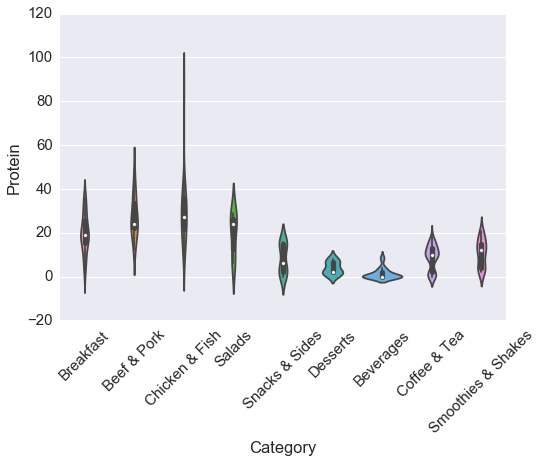

In [10]:
x = sns.violinplot(x="Category", y="Protein", data=df)
#ax = sns.stripplot(x="Category", y="Protein", data=df, jitter = True, edgecolor="gray")

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

#I dont know how to make the [None, None, None, None...]-box go away. If you know, please feel free to write it in the comments

Now, Calories distribution

[None, None, None, None, None, None, None, None, None]

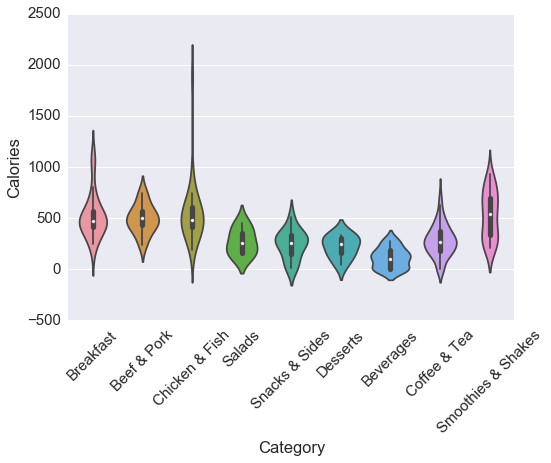

In [11]:
sns.violinplot(x="Category", data = df,y = "Calories")
locs,labels=  plt.xticks()
plt.setp(labels, rotation=45)

Let's see the sugar constituent of the food items

[None, None, None, None, None, None, None, None, None]

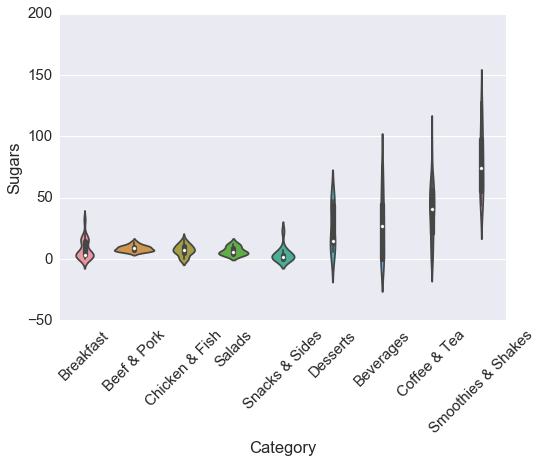

In [12]:
sns.violinplot(x="Category", data = df,y = "Sugars")
locs,labels=  plt.xticks()
plt.setp(labels, rotation=45)

After examining the distribution of various nutrients in McD's meals. Let's move forward to coorelation b/w various nutrients in the meal.

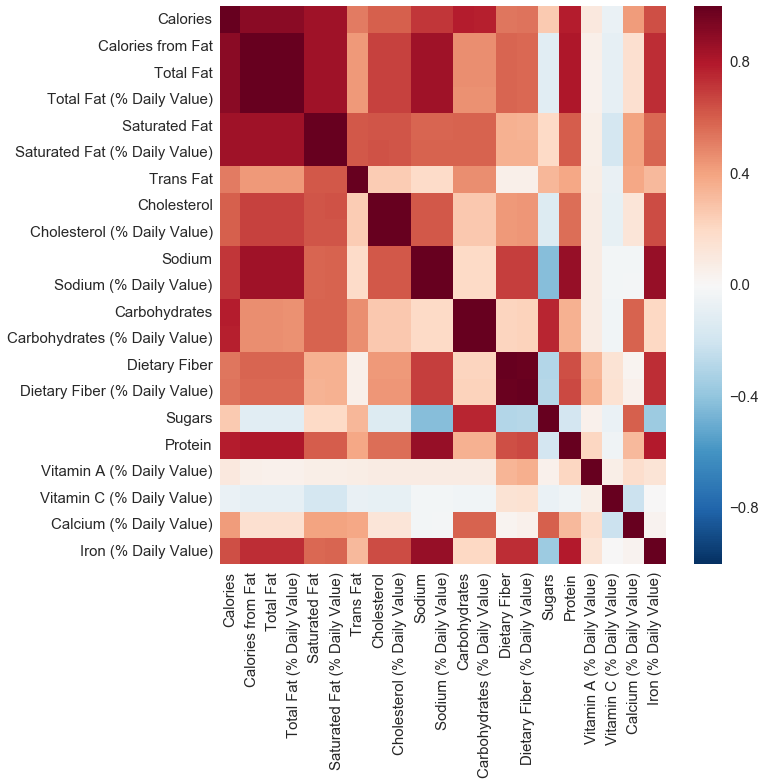

In [ ]:
#Correlation plot, heatmap to show relationship between various paramters
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

We can see that there are various parameters with strong coorelation between them.
Lets plot these strong relationships individually.

In [ ]:
#Co-orelation plot between calories and Protein 
sns.jointplot(x= "Calories", y = "Protein", data = df,  kind="reg", space=0, color="g")
#Co-orelation plot between calories and Carbohydrates
sns.jointplot(x= "Calories", y = "Carbohydrates", data = df,  kind="reg", space=0, color="g")
#Co-orelation plot between Total Fat and Protein 
sns.jointplot(x= "Total Fat", y = "Protein", data = df,  kind="reg", space=0, color="g") 
#Co-orelation plot between calories and Protein 
sns.jointplot(x= "Calories", y = "Protein",data = df,  kind="reg", space=0, color="g")

I found that there is some problem with encoding of data.The following method is to solve that problem.

In [ ]:
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

Now, let us see nutrient richness w.r.t to items 

In [ ]:
#Function to plot bar graphs
def barplotter(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index()
    item_list = item_list[-20:]
    #Sizing the image canvas
    plt.figure(figsize=(8,9))
    #To plot bargraph
    g = sns.barplot(item_list.index,item_list.values)
    labels = [aj.get_text()[-50:] for aj in g.get_yticklabels()]
    g.set_yticklabels(labels)


In [ ]:
#Plot for carbohydrates
alpha = df.groupby(df["Carbohydrates"])
barplotter(alpha)


In [ ]:
#Plot for protein
beta = df.groupby(df["Protein"])
barplotter(beta)

In [ ]:
#Plot for calories
gamma = df.groupby(df["Calories"])
barplotter(gamma)

In [ ]:
#Plot for Dietary Fiber(% Daily Value)
delta = df.groupby(df["Dietary Fiber (% Daily Value)"])
barplotter(delta)

In [ ]:
#Plot for Iron(% Daily Value)
omega = df.groupby(df["Iron (% Daily Value)"])
barplotter(delta)

In [ ]:
#Plot for Calcium(% Daily Value)
psi = df.groupby(df["Calcium (% Daily Value)"])
barplotter(psi)

In [ ]:
#Plot for Total Fat(% Daily Value)
omega = df.groupby(df["Total Fat"])
barplotter(omega)

## Take Away From Plots

1. There are more options in beverages followed by Breakfast to choose from.
2. We plotted nutritional content of various meal categories on violin plots.
3. In the coorelation plots we found some very strong relationships between the various parameters. Then, we plotted them individually to explore them further.
4. Lastly, we plotted nutrient cntent of food items in horizonal bar plots.plt.figure(figsize=(8, 6))